This notebook will follow the CRISP-DM process .First we need to  understanding the business and the data . Initial analysis has been performed to see what variables we have in each of the datasets provided from Airbnb in order to create some useful business related questions and insights. The raw data will be read in and examined using basic statistical analysis and visualisations. I selected one of the famous opened datasets in the internet which is Airbnb dataset. I will use [Boston Airbnb](https://www.kaggle.com/airbnb/boston/) and [Seattle Airbnb](https://www.kaggle.com/airbnb/seattle/data) datasets. 
I did data cleansing, data wrangling and data preparation before answering the question or doing data modeling.
Here, I will try to answer four questions which are:
- What is most common property type for rent in each state?
- What aspects correlate well to the listing review scores rating?
- How can I predict the listings prices in Boston and Seattle?  

In order to answer the questions, I will follow the CRISP-DM process which are: Business understanding, Data understanding, Data preparation, Modeling, Evaluation, Deployment.


*I will not apply the last step.* 

## Data Understanding

The goal of this step is to understand what you want to accomplish from a business perspective and to set the project objectives.  

The project objectives are:
- Identifying  the most presented property type for rent in each state.
- Finding the relations between the listing review score and the other features in the dataset.
- Identifying  the average of the home renting prices in Seattle and Boston and knowing in which seasons the prices spike.
- Predicting the listings prices in Boston and Seattle.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Sklearn for data prep
from sklearn.preprocessing import MultiLabelBinarizer
import re

# Imports basic functions
import pandas as pd
import numpy as np
import re

# Imports functions for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import matplotlib.style as style

# Sklearn imports
#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

## Data Understanding

This step includes data loading and data exploration. 

In [2]:
# Read in the .csv files for Seattle 
Seattle_Cal = pd.read_csv('Data/Seattle/calendar.csv')
Seattle_List = pd.read_csv('Data/Seattle/listings.csv')
Seattle_Rev = pd.read_csv('Data/Seattle/reviews.csv')

# Read in the .csv files for Boston 
Boston_Cal = pd.read_csv('Data/Boston/calendar.csv')
Boston_List = pd.read_csv('Data/Boston/listings.csv')
Boston_Rev = pd.read_csv('Data/Boston/reviews.csv')

Understanding Seattle Calender

In [3]:
# Look at the head of the calender.csv
Seattle_Cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Check the proption of NaN's in the price column
pd.isnull(Seattle_Cal).sum()/len(Seattle_Cal)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [5]:
Seattle_Cal.shape

(1393570, 4)

In [6]:
# Count the number of different ID's
len(Seattle_Cal.listing_id.unique())

3818

In [7]:
Seattle_Cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# Check if all days are counted for all listings
(Seattle_Cal.groupby(['listing_id']).count() == 365)['date'].value_counts()

True    3818
Name: date, dtype: int64

In [9]:
# Check the proption of NaN's in the price column
pd.isnull(Seattle_Cal).sum()/len(Seattle_Cal)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [10]:
# Check if the number of 'f' values same as missing prices
Seattle_Cal['available'].value_counts()/len(Seattle_Cal)*100

t    67.061002
f    32.938998
Name: available, dtype: float64

Uderstanding Boston Calander

In [11]:
# Look at the top 5 rows of the calender.csv
Boston_Cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [12]:
# Count the number of different ID's
len(Boston_Cal.listing_id.unique())

3585

In [13]:
Boston_Cal.shape

(1308890, 4)

In [14]:
Boston_Cal.info

<bound method DataFrame.info of          listing_id        date available price
0          12147973  2017-09-05         f   NaN
1          12147973  2017-09-04         f   NaN
2          12147973  2017-09-03         f   NaN
3          12147973  2017-09-02         f   NaN
4          12147973  2017-09-01         f   NaN
...             ...         ...       ...   ...
1308885    14504422  2016-09-10         f   NaN
1308886    14504422  2016-09-09         f   NaN
1308887    14504422  2016-09-08         f   NaN
1308888    14504422  2016-09-07         f   NaN
1308889    14504422  2016-09-06         f   NaN

[1308890 rows x 4 columns]>

In [15]:
# Check if all days are counted for all listings
(Boston_Cal.groupby(['listing_id']).count() == 365)['date'].value_counts()

True     3584
False       1
Name: date, dtype: int64

In [16]:
# Check the proption of NaN's in the price column
pd.isnull(Boston_Cal).sum()/len(Seattle_Cal)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         47.780377
dtype: float64

In [17]:
# Check if the number of 'f' values corresponds to missing prices
Boston_Cal['available'].value_counts()/len(Boston_Cal)*100

f    50.871578
t    49.128422
Name: available, dtype: float64

Understanding  Listing.csv

In [18]:
# The size of Boston dataset 
Boston_List.shape

(3585, 95)

In [19]:
# The size of Seattle dataset 
Seattle_List.shape

(3818, 92)

In [20]:
Boston_List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [21]:
Seattle_List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [22]:
Seattle_List.select_dtypes('object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [23]:
#the number of ID's is same as calender.csv
len(Seattle_List.id.unique())

3818

In [24]:
# Check if each ID is only listed once
Seattle_List.shape

(3818, 92)

In [25]:
# Check each of the columns for NaN's and show  one's with highest Nan
data = pd.isnull(Seattle_List).sum()/len(Seattle_List)*100
data.sort_values(ascending=False).head(20)

license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
reviews_per_month               16.422211
first_review                    16.422211
dtype: float64

In [26]:
# Check each of the columns for NaN's and show show  one's with highest Nan
data = pd.isnull(Boston_List).sum()/len(Boston_List)*100
data.sort_values(ascending=False).head(20)

neighbourhood_group_cleansed    100.000000
jurisdiction_names              100.000000
license                         100.000000
has_availability                100.000000
square_feet                      98.437936
monthly_price                    75.230126
weekly_price                     75.118550
security_deposit                 62.566248
notes                            55.090656
interaction                      43.347280
access                           41.534170
neighborhood_overview            39.470014
host_about                       36.513250
transit                          35.983264
house_rules                      33.249651
cleaning_fee                     30.878661
space                            29.483961
review_scores_accuracy           22.956764
review_scores_location           22.928870
review_scores_value              22.900976
dtype: float64

## Data Preperation

This step inludes data selection and data cleaning. I will remove some columns that I think they are not important in the project. I will also do some necessary data preparation as:

- Deleting the different coulmns in Boston dataset. 
- Exploring the missing values in each column, and finding the columns that have no missing values and the cloumns that have more than 50% missing values.
- Converting the price coulmns from object to float.
- Converting the date coulmns from object to datetime.

*Some of the preperation steps will be done when answering the questions.* 

In [27]:
# Check the new columns in Boston_List
differ_col = []
for x in Boston_List.columns:
    if x not in Seattle_List.columns:
        differ_col.append(x)
        print(x)

access
interaction
house_rules


In [28]:
# Delete the differnt coulumns from Boston dataset
Boston_List = Boston_List.drop(differ_col, axis = 1)

In [29]:
Boston_List.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [30]:
Seattle_List.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [31]:
# Dropped columnsthat have very little to do with how much the AirBnB costs: state, dates of reviews, availability, if it's bookable, host info
   
    # Variables like steert were seen as being to granular    
keep_col = ['id', 'neighbourhood', 'zipcode', 'property_type', 
                'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 
                'monthly_price', 'number_of_reviews', 'review_scores_rating',
                'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']
    
Seattle_List = Seattle_List[keep_col]

In [32]:
# Removes and prints columns with more than 90% of data missing
# Just drops 'square_feet' as it has very little data
data_dpcol = Seattle_List.dropna(axis=1, thresh=len(data)*0.1)
dropped_col = set(Seattle_List.columns).difference(list(data_dpcol.columns))
print(f'Columns dropped: {dropped_col}')

Columns dropped: set()


In [33]:
    # Removes rows with all missing values (Othes may be useful)
data_fil = data_dpcol.dropna(axis=0, thresh=1)
print(f'Number of rows dropped: {len(data_dpcol)-len(data_fil)}')

Number of rows dropped: 0


In [34]:
# Selects the columns related to price
price_columns = ['price','weekly_price','monthly_price']

for column in price_columns:
    #Zero NaN's for now as they can be replaced by an average later on
    data_fil[column] = data_fil[column].fillna(0)

    #Formats the price columns
    data_fil[column] = [int(str(x).replace('$','').replace(',','').replace('.00','')) 
                            for x in data_fil[column]]

In [35]:
# Find the columns that have no missing values in Seattle listing dataset
Seattle_List .columns[Seattle_List .isnull().sum() == 0]

Index(['id', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'number_of_reviews'],
      dtype='object')

In [36]:
# Dropped columnsthat have very little to do with how much the AirBnB costs: state, dates of reviews, availability, if it's bookable, host info
   
    # Variables like steert were seen as being to granular    
keep_col = ['id', 'neighbourhood', 'zipcode', 'property_type', 
                'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 
                'monthly_price', 'number_of_reviews', 'review_scores_rating',
                'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']
    
Boston_List = Boston_List[keep_col]

In [37]:
# Removes and prints columns with more than 90% of data missing
# Just drops 'square_feet' as it has very little data
data_dpcol = Boston_List.dropna(axis=1, thresh=len(data)*0.1)
dropped_col = set(Boston_List.columns).difference(list(data_dpcol.columns))
print(f'Columns dropped: {dropped_col}')

Columns dropped: set()


In [38]:
    # Removes rows with all missing values (Othes may be useful)
data_fil = data_dpcol.dropna(axis=0, thresh=1)
print(f'Number of rows dropped: {len(data_dpcol)-len(data_fil)}')

Number of rows dropped: 0


In [39]:
# Selects the columns related to price
price_columns = ['price','weekly_price','monthly_price']

for column in price_columns:
    #Zero NaN's for now as they can be replaced by an average later on
    data_fil[column] = data_fil[column].fillna(0)

    #Formats the price columns
    data_fil[column] = [int(str(x).replace('$','').replace(',','').replace('.00','')) 
                            for x in data_fil[column]]

In [40]:
# Find the columns that have no missing values in Seattle listing dataset
Boston_List .columns[Boston_List .isnull().sum() == 0]

Index(['id', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'number_of_reviews'],
      dtype='object')

In [41]:
# Find the columns that have no missing values in Boston listing dataset
Boston_List .columns[Boston_List.isnull().sum() == 0]

Index(['id', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'number_of_reviews'],
      dtype='object')

**Note:** I can see that the columns that do not have missing values are almost same in the two datasets. 

In [42]:
# Find cloumns that have more than 50% missing values in Seattlelisting dataset
Seattle_List .columns[Seattle_List .isnull().sum() > Seattle_List .shape[0] * 0.5]

Index(['square_feet', 'monthly_price'], dtype='object')

In [43]:
# Find cloumns that have more than 50% missing values in Boston listing dataset
Boston_List .columns[Boston_List.isnull().sum() > Boston_List.shape[0] * 0.5]

Index(['square_feet', 'weekly_price', 'monthly_price'], dtype='object')

**Note:** 
The Boston dataset has nine columns that have 50% missing values whearas Seattle dataset has four columns that have 50% missing values. I will delete all the nine columns from the two dataset. 


In [44]:
# Delete cloumns that have more than 50% missing values in Boston and Seattle listing datases
drop_col_Seattle =Seattle_List.columns[Seattle_List.isnull().sum() > Seattle_List.shape[0] * 0.5]
drop_col_Seattle

Index(['square_feet', 'monthly_price'], dtype='object')

In [45]:
# Delete cloumns that have more than 50% missing values in Boston and Seattle listing datases
drop_col =Boston_List.columns[Boston_List.isnull().sum() > Boston_List.shape[0] * 0.5]
drop_col

Index(['square_feet', 'weekly_price', 'monthly_price'], dtype='object')

In [46]:
# Convert price to float


Seattle_List ['price'] = Seattle_List ['price'].replace('[\$,]', '', regex=True).astype(float)
Seattle_List ['price'] = Seattle_List ['price'].replace('[\$,]', '', regex=True).astype(float)
Boston_List ['price'] = Boston_List ['price'].replace('[\$,]', '', regex=True).astype(float)
Boston_List ['price'] = Boston_List ['price'].replace('[\$,]', '', regex=True).astype(float)
  
    

In [47]:
Boston_List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   neighbourhood                3042 non-null   object 
 2   zipcode                      3547 non-null   object 
 3   property_type                3582 non-null   object 
 4   room_type                    3585 non-null   object 
 5   accommodates                 3585 non-null   int64  
 6   bathrooms                    3571 non-null   float64
 7   bedrooms                     3575 non-null   float64
 8   beds                         3576 non-null   float64
 9   bed_type                     3585 non-null   object 
 10  amenities                    3585 non-null   object 
 11  square_feet                  56 non-null     float64
 12  price                        3585 non-null   float64
 13  weekly_price      

In [48]:
Seattle_List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   int64  
 1   neighbourhood                3402 non-null   object 
 2   zipcode                      3811 non-null   object 
 3   property_type                3817 non-null   object 
 4   room_type                    3818 non-null   object 
 5   accommodates                 3818 non-null   int64  
 6   bathrooms                    3802 non-null   float64
 7   bedrooms                     3812 non-null   float64
 8   beds                         3817 non-null   float64
 9   bed_type                     3818 non-null   object 
 10  amenities                    3818 non-null   object 
 11  square_feet                  97 non-null     float64
 12  price                        3818 non-null   float64
 13  weekly_price      

In [49]:
Boston_Cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [50]:
Seattle_Cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [51]:
# The price is only useful for days that have data so drop NaN's in this case
# We can interpolate these days in for the seasonal analysis    
Seattle_Cal = Seattle_Cal.dropna()
Boston_Cal_clean = Boston_Cal.dropna()

In [52]:
# Convert to datetime dtype
 
Boston_Cal['date'] = pd.to_datetime(Boston_Cal['date'])
Seattle_Cal['date'] = pd.to_datetime(Seattle_Cal['date'])

In [53]:
Seattle_Cal['price'] = Seattle_Cal['price'].replace('[\$,]', '', regex=True).astype(float)
Boston_Cal['price'] = Seattle_Cal['price'].replace('[\$,]', '', regex=True).astype(float)

In [54]:
# Drops unwanted columns 
Seattle_Cal= Seattle_Cal[['listing_id','price','date']]
Boston_Cal = Boston_Cal[['listing_id','price','date']]

In [55]:
Seattle_Cal.head()

,listing_id,price,date
0,241032,85.0,2016-01-04
1,241032,85.0,2016-01-05
9,241032,85.0,2016-01-13
10,241032,85.0,2016-01-14
14,241032,85.0,2016-01-18


In [56]:
Boston_Cal.head()

,listing_id,price,date
0,12147973,85.0,2017-09-05
1,12147973,85.0,2017-09-04
2,12147973,NaN,2017-09-03
3,12147973,NaN,2017-09-02
4,12147973,NaN,2017-09-01


## Modeling and evaluation

The goal of this step is to build a model to answer the questions. In the first three, I do not need to use a machine learning model so, I will use some statistical techniques with visualization to answer the question. For answering the last question, I will use a machine learning modeland the evaluate it.



### Question 1: Which neighbourhood has the most amount of rent in each state?

To answer this question, I will use viualization. 

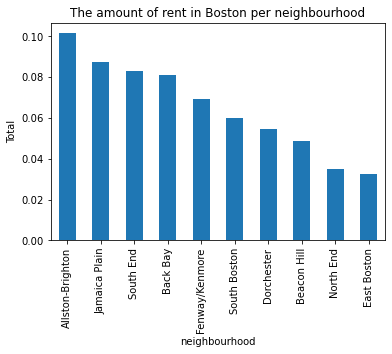

In [57]:
# Show  neighborhood which has the most amount of rent in Boston
neighbourhood = pd.Series(Boston_List['neighbourhood'].value_counts())
(neighbourhood.head(10)/Boston_List.shape[0]).plot(kind = 'bar');
plt.title('The amount of rent in Boston per neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Total');

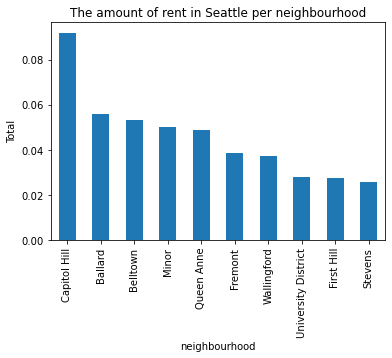

In [58]:
# Show  neighborhood which has the most amount of rent in Boston
neighbourhood_val = pd.Series(Seattle_List['neighbourhood'].value_counts())
(neighbourhood_val.head(10)/Seattle_List.shape[0]).plot(kind = 'bar');
plt.title('The amount of rent in Seattle per neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Total');

**The answer:**

As we can see, there are different neighbouhood in Seattle and Boston. In Boston is "Allstone-Brrighton",  and in Seattle Capital Hill have the highest amount of rent.

## Question 2: Among Boston and Seattle on average which one has higher listing prices?

In [59]:
# First I will look at the price metric in the calender data
Seattle_prices = Seattle_Cal.groupby('listing_id').mean()
Boston_prices = Boston_Cal.groupby('listing_id').mean()

In [60]:
def compare_plot(a,b):
        # Setup the graphs and add the main title
        fig, axes = plt.subplots(nrows=1, ncols=2)
        plt.suptitle("Seattle Vs Boston Airbnb Prices (Calender Data)", y = 1.05, fontsize=20)
        ax0, ax1 = axes.flatten()
        ax0.hist(a, bins=40 ,color= 'green')
        ax1.hist(b, bins=40,color='blue')
        ax0.set_xlabel('Prices ($)', fontsize=12)
        ax1.set_xlabel('Prices ($)', fontsize=12)
        # Sets up the title based on the plotting column and the market    
        ax0.set_title("Seattle - Listing Prices", fontsize=12)
        # Sets up the title based on the plotting column and the market    
        ax1.set_title("Boston - Listing Prices", fontsize=12)
        plt.tight_layout()

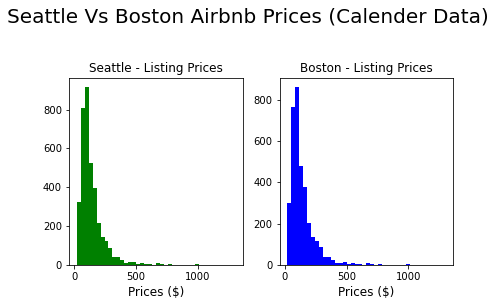

In [61]:
compare_plot(Seattle_prices,Boston_prices)

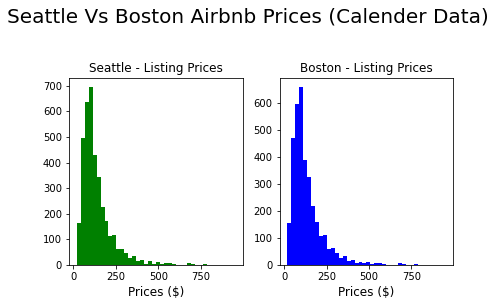

In [62]:
a = Seattle_prices[Seattle_prices['price'] < 1000]
b = Boston_prices[Boston_prices['price'] < 1000]
compare_plot(a,b)

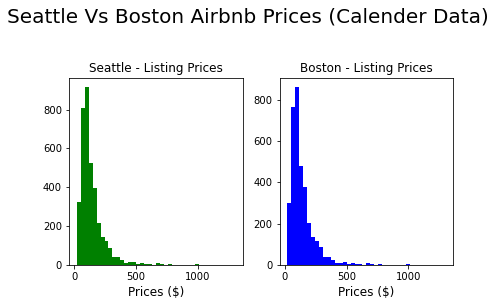

In [63]:
 # Setup the graphs and add the main title
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Seattle Vs Boston Airbnb Prices (Calender Data)", y = 1.05, fontsize=20)
ax0, ax1 = axes.flatten()
ax0.hist(Seattle_prices, bins=40 ,color= 'green')
ax1.hist(Boston_prices, bins=40,color='blue')
ax0.set_xlabel('Prices ($)', fontsize=12)
ax1.set_xlabel('Prices ($)', fontsize=12)
# Sets up the title based on the plotting column and the market    
ax0.set_title("Seattle - Listing Prices", fontsize=12)
# Sets up the title based on the plotting column and the market    
ax1.set_title("Boston - Listing Prices", fontsize=12)
plt.tight_layout()

The price is skewed signifcantly in both Seattle and Boston. The lower end after 500$ ,the properties are more spread out across the range as a whole whereas Seattle has a huge spike around 100. I replot the above plots to show only prices less than 1000 to better show the differences between them. 



**Answer:**
 According to the Calender ,from these plots we can conclude that  data Boston on average has higher listing prices than Seattle.

## Question 3: How can I predict the price listings prices in Boston and Seattle?

The goal of this question is to build a model for prices prediction using RandomForestRegressor model. For the ML, I will use the random forests algorthim because with many features here (I have 92 fetatures to train) so it is better to create regression model with random forests algorthim. Moreover, It's training is quick but sometimes it can overfit . This regression model determin the relationship between predictor variables (house features) and response variable(price) which is a continuous variable. Before creating the model, I need to some data preperation techinques. In this part, I will do the following:

#### 1-Select some features that I think they are related to the price.
#### 2- Change the amenities column from a multi value column to single value columns.
#### 3- Change categorical column to dummy categorical columns.
#### 4- Fill the mean of the column for any missing values.
#### 5- Create training and test sets of data.
#### 6- Instantiate a RandomForestRegressor model with normalized data.
#### 7- Fit the model to the training data.
#### 8- Calculate the rscore value for both the training and test data.


In [376]:
#prepare calender data for merging
# Group the data by listing
# Set the listing_id as the index and drop date for calendar_data
cal_data_seattle = Seattle_Cal.groupby('listing_id').median().round()
cal_data_seattle = Seattle_Cal.groupby('listing_id').median().round()
 
#rename cal_data coloumns to cal_price before merging
#cal_data =  cal_data[['price']]
cal_data_seattle.columns = ['Cal_price']
cal_data_seattle = Seattle_Cal.groupby('listing_id').median().round()

# Group the data by listing
# Set the listing_id as the index and drop date for calendar_data
cal_data_Boston = Seattle_Cal.groupby('listing_id').median().round()
cal_data_Boston = Seattle_Cal.groupby('listing_id').median().round()
 
#rename cal_data coloumns to cal_price before merging
#cal_data =  cal_data[['price']]
cal_data_Boston.columns = ['Cal_price']
cal_data_Boston = Boston_Cal.groupby('listing_id').median().round()

In [377]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)

In [378]:

#lets merges the two most useful datasets for this analysis calender & listings
    
# Set the index for Listings as id
Seattle_List.index = Seattle_List['id']
#lets delet index column because we have already convert it to index of table
Listing_data_Seattle = Seattle_List.drop(columns=['id'])
# For  this analysis need merged data 
merged_Seattle = pd.merge(cal_data_seattle, Listing_data_Seattle, left_index=True, right_index=True)

# Set the index for Listings as id
Boston_List.index = Boston_List['id']
#lets delet index column because we have already convert it to index of table
Listing_data_Boston = Boston_List.drop(columns=['id'])
    
# For  this analysis need merged data 
merged_Boston = pd.merge(cal_data_Boston, Listing_data_Boston, left_index=True, right_index=True)


In [379]:
merged_Seattle.head()

,price_x,neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,monthly_price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3335,120.0,Dunlap,98118,NaN,Entire home/apt,4,1.0,2.0,2.0,Real Bed,...,"$1,600.00",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4291,82.0,Roosevelt,98115,House,Private room,2,1.0,1.0,1.0,Real Bed,...,"$1,925.00",35,92.0,10.0,9.0,10.0,9.0,9.0,9.0,1.14
5682,53.0,South Delridge,98106,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,"$1,250.00",297,96.0,10.0,10.0,10.0,10.0,9.0,10.0,4.21
6606,90.0,Wallingford,98103,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,NaN,52,93.0,9.0,9.0,10.0,9.0,10.0,9.0,0.66
7369,85.0,Broadway,98122,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,NaN,40,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0.50


In [380]:
merged_Seattle.price_y

3335        120.0
4291         82.0
5682         48.0
6606         90.0
7369         85.0
            ...  
10331249     45.0
10332096     40.0
10334184    120.0
10339145    219.0
10340165     43.0
Name: price_y, Length: 3723, dtype: float64

In [381]:
merged_Boston.head()

,price_x,neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,monthly_price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3353,125.0,Allston-Brighton,02134,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,"$1,200.00",34,90.0,9.0,8.0,9.0,9.0,9.0,9.0,0.38
5506,50.0,Roxbury,02119,House,Private room,2,1.0,1.0,1.0,Real Bed,...,"$3,000.00",36,91.0,9.0,10.0,10.0,10.0,9.0,10.0,0.40
6695,80.0,Roxbury,02119,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,NaN,47,95.0,9.0,10.0,10.0,10.0,8.0,9.0,0.54
6976,1450.0,Roslindale,02131,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,"$1,350.00",41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
8792,80.0,Beacon Hill,02108,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,...,"$2,900.00",18,91.0,10.0,9.0,10.0,9.0,10.0,10.0,0.21


In [382]:
merged_Seattle.columns

Index(['price_x', 'neighbourhood', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price_y', 'weekly_price', 'monthly_price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [383]:
# Drop the extra price columns as they are not needed for this analysis (They are similar to the calender price)
Seattle_drop = merged_Seattle.drop(columns=['weekly_price','monthly_price', 'price_y','zipcode' ])
Boston_drop = merged_Boston.drop(columns=['weekly_price','monthly_price'])

In [384]:
Seattle_drop.columns

Index(['price_x', 'neighbourhood', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [385]:
# Check datatypes to see catagorical variables
Seattle_drop.dtypes

price_x                        float64
neighbourhood                   object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
square_feet                    float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [386]:
pd.isnull(Seattle_drop).sum()/len(Seattle_drop)*100

price_x                         0.000000
neighbourhood                  10.958904
property_type                   0.026860
room_type                       0.000000
accommodates                    0.000000
bathrooms                       0.429761
bedrooms                        0.161160
beds                            0.026860
bed_type                        0.000000
amenities                       0.000000
square_feet                    97.448294
number_of_reviews               0.000000
review_scores_rating           16.706957
review_scores_accuracy         17.002417
review_scores_cleanliness      16.868117
review_scores_checkin          17.002417
review_scores_communication    16.814397
review_scores_location         16.921837
review_scores_value            16.948697
reviews_per_month              16.169756
dtype: float64

In [387]:
Seattle_drop.select_dtypes('object').shape[1]

5

In [388]:
Seattle_drop.select_dtypes(['float64','int64']).shape[1]

15

In [389]:
#show only all columns except object
Seattle_drop.select_dtypes(exclude='object')


,price_x,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3335,120.0,4,1.0,2.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4291,82.0,2,1.0,1.0,1.0,NaN,35,92.0,10.0,9.0,10.0,9.0,9.0,9.0,1.14
5682,53.0,2,1.0,1.0,1.0,NaN,297,96.0,10.0,10.0,10.0,10.0,9.0,10.0,4.21
6606,90.0,2,1.0,1.0,1.0,NaN,52,93.0,9.0,9.0,10.0,9.0,10.0,9.0,0.66
7369,85.0,2,1.0,1.0,1.0,800.0,40,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331249,45.0,1,1.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10332096,40.0,2,1.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10334184,120.0,2,1.0,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10339145,219.0,5,2.0,2.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
# Replace Numerical Catagorical Variables with mode
numeric_cata = ['review_scores_rating','accommodates',
                    'bathrooms','bedrooms','beds',
                    'review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication',
                    'review_scores_location','review_scores_value']
Seattle_drop[numeric_cata] = Seattle_drop[numeric_cata].fillna(Seattle_drop.mode().iloc[0])
                                                               
# Replace reviews with the average rounded as they are the only other numerical columns with missing values
reviews_data = ['reviews_per_month']
Seattle_drop['reviews_per_month'] = Seattle_drop['reviews_per_month'].fillna(Seattle_drop['reviews_per_month'].median())

In [391]:
Seattle_drop.select_dtypes(include='object')

,neighbourhood,property_type,room_type,bed_type,amenities
3335,Dunlap,NaN,Entire home/apt,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ..."
4291,Roosevelt,House,Private room,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F..."
5682,South Delridge,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Heati..."
6606,Wallingford,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
7369,Broadway,Condominium,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Elevator in B..."
...,...,...,...,...,...
10331249,NaN,House,Private room,Real Bed,"{Internet,""Wireless Internet"",""Pets live on th..."
10332096,Olympic Hills,House,Private room,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."
10334184,Capitol Hill,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
10339145,Alki,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [392]:
import re
# Drop the NaN's and unwanted columns
Seattle_drop = Seattle_drop.drop(columns=['neighbourhood'])
Seattle_drop = Seattle_drop.dropna()

# Some processing needs to be used to edit bad zipcodes
#Seattle_drop['zipcode'] = [re.sub(r'\b(\d{1,4}|\d{6,}|\D)\b','',x)[0:5] for x in Seattle_drop['zipcode']]
#make sure there is no null 
pd.isnull(Seattle_drop).sum()/len(Seattle_drop)*100

price_x                        0.0
property_type                  0.0
room_type                      0.0
accommodates                   0.0
bathrooms                      0.0
bedrooms                       0.0
beds                           0.0
bed_type                       0.0
amenities                      0.0
square_feet                    0.0
number_of_reviews              0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
reviews_per_month              0.0
dtype: float64

In [393]:
# Turn the amenities data into a list of amenities
Seattle_drop['amenities'] = [x.replace('{','').replace('}','').replace('"','').split(',') for x in Seattle_drop['amenities']]

In [394]:
Seattle_drop['amenities']

7369       [TV, Wireless Internet, Kitchen, Elevator in B...
9419       [Internet, Wireless Internet, Air Conditioning...
9531       [TV, Cable TV, Internet, Wireless Internet, Wh...
13068      [TV, Cable TV, Internet, Wireless Internet, Ai...
15108      [Internet, Wireless Internet, Kitchen, Pets li...
                                 ...                        
2197982    [TV, Cable TV, Internet, Wireless Internet, Ki...
2203983    [TV, Wireless Internet, Kitchen, Free Parking ...
2267088    [TV, Internet, Wireless Internet, Kitchen, Fre...
2309250    [TV, Cable TV, Internet, Wireless Internet, Ki...
8673979    [Internet, Wireless Internet, Air Conditioning...
Name: amenities, Length: 95, dtype: object

In [395]:
# Use MultiLabelBinarizer() to one hot encode the amenities data because amenities column has multiple labels.
mlb = MultiLabelBinarizer()
amenities = pd.DataFrame(mlb.fit_transform(Seattle_drop.pop('amenities')),
                          columns=mlb.classes_,
                          index=Seattle_drop.index)
amenities.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
7369,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
9419,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
9531,0,0,0,0,1,1,0,0,0,1,...,1,1,1,0,1,1,1,0,1,1
13068,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
15108,0,0,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1


In [396]:
#lets see the remaining categorical variable  
Seattle_drop.select_dtypes(include='object')

,property_type,room_type,bed_type
7369,Condominium,Entire home/apt,Real Bed
9419,House,Private room,Real Bed
9531,House,Entire home/apt,Real Bed
13068,House,Entire home/apt,Real Bed
15108,House,Private room,Real Bed
...,...,...,...
2197982,Apartment,Entire home/apt,Real Bed
2203983,House,Entire home/apt,Real Bed
2267088,Apartment,Entire home/apt,Real Bed
2309250,House,Entire home/apt,Real Bed


In [412]:
#lets select these categorical variable to produce 
non_numeric_cata = [ 'property_type', 'room_type', 'bed_type']

In [413]:
# we can get dummies the rest of the non-numeric catagorical data
nn_cata = pd.get_dummies(Seattle_drop[non_numeric_cata])

In [414]:
#lets drop those categorical variable that have been converted to dummy in previous part
Seattle_input = Seattle_drop.drop(columns=['property_type', 'room_type', 'bed_type'])

Seattle_join_temp = pd.merge(Seattle_input, nn_cata, left_index=True, right_index=True)
Seattle_join =  pd.merge(Seattle_join_temp, amenities, left_index=True, right_index=True)

In [415]:
Seattle_join.head()

,price_x,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
7369,85.0,2,1.0,1.0,1.0,800.0,40,94.0,10.0,10.0,...,0,1,1,0,0,1,1,0,0,1
9419,90.0,2,3.0,1.0,1.0,200.0,79,91.0,9.0,9.0,...,0,1,1,0,0,0,0,0,0,1
9531,165.0,4,1.0,2.0,5.0,1200.0,26,100.0,10.0,10.0,...,1,1,1,0,1,1,1,0,1,1
13068,360.0,10,2.0,3.0,5.0,1850.0,26,93.0,9.0,9.0,...,0,1,1,0,0,1,1,0,0,1
15108,60.0,2,1.5,1.0,1.0,140.0,42,86.0,9.0,8.0,...,1,0,1,0,0,0,1,0,0,1


In [416]:
Seattle_join.columns

Index(['price_x', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Cabin', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Entire home/apt', 'room_type_Private room',
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', '24-Hour Check-in',
       'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Cable TV',
       'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer',
       'Elevator in Building', 'Essentials', 'Family

In [417]:
len(Seattle_join.columns[0:])

71

In [418]:
# Set the X & Y variables
X = Seattle_join.iloc[:,1:]
Y = Seattle_join.iloc[:,0].values

# split into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [420]:
#training RF regressor model
model_forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
model_forest.fit(X_train, y_train.squeeze())


y_train_preds = model_forest.predict(X_train)
y_test_preds = model_forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 485.810, test: 6829.493
Random Forest R^2 train: 0.951, test: 0.540


In [443]:
# Calculate accuracy instead of RMSE

# Obtain the absolute erros for each prediction
errors = abs(y_preds - y_test)

# Calculate mean absolute percentage error (MAE)
mae = np.mean(errors)

print('Mean Absolute error:', round(np.mean(mae)))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute error: 54
Accuracy: 65.9 %.


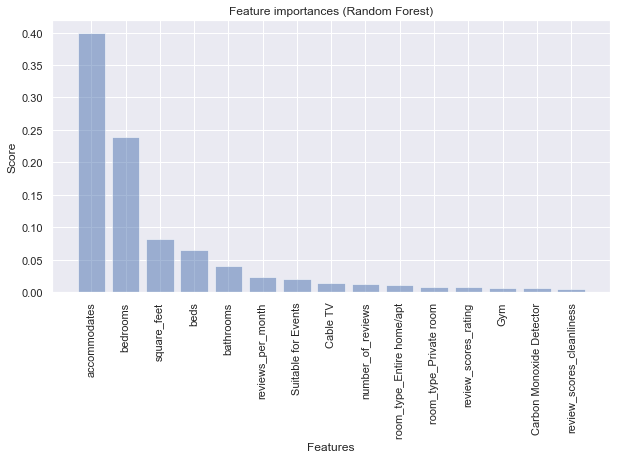

In [444]:
#getting feature importances from the model
col_heads = ["name", "score"]
values = sorted(zip(X_train.columns, model_forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = col_heads)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

#plotting top 15 features as per feature importance
features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

In [447]:
#train XGBoost model
model_xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model_xgb.fit(X_train,y_train)


y_train_preds = model_xgb.predict(X_train)
y_test_preds = model_xgb.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

MSE train: 20.013, test: 5809.195
R^2 train: 0.998, test: 0.608


C:\Users\iranm\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [448]:
# Calculate accuracy instead of RMSE

# Obtain the absolute erros for each prediction
errors = abs(y_test_preds - y_test)

# Calculate mean absolute percentage error (MAE)
mae = np.mean(errors)

print('Mean Absolute error:', round(np.mean(mae)))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute error: 49
Accuracy: 69.49 %.


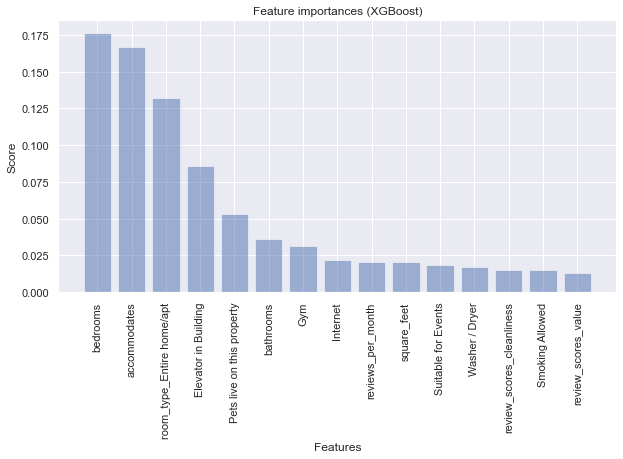

In [434]:
#get feature importances from the model
col_heads = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = col_heads)

#plotting top 15 features as per feature importance
features = xgb_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')

plt.savefig('feature importances XGB.png')
 
plt.show()

**The answer:**

The r2 score of the prediction model for Seattle database with Random Forest algorithm,R^2  are 0.951 for train, and 0.540 for test . with XGBoost algorithm,R^2  are 0.998 for train, and 0.608 for test. There is no overfitting in the model, but I think the model needs some improvments to increase the r2 score for test dataset. XGBoost algorithm has better accuracy and R^2.
In Random forest algorithms the important features that impact on price are slightly different from XGBoost. But they have many common features that have impact on price. Bedrooms and accomodationin both are the most important featurs that influence on price.

We can repeat steps 1 to 8 for boston to create a model.